<a href="https://colab.research.google.com/github/rosipapa/colab/blob/main/agile_project_dashboard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Create a Jira dashboard using data sample generate by ChatGPT.**


Jira supports the import/export of issues using CSV (Comma-Separated Values) files.

1. Headers: The first row of your CSV file should contain headers that match Jira field names. Common fields include Issue Type, Summary, Description, Reporter, Assignee, Priority, Status, etc.

2. Issue Type: This field specifies the type of issue, such as Bug, Task, or Story.

3. Summary: A brief, one-line summary of the issue.

4. Description: A more detailed description of the issue.

5. Reporter: The person reporting the issue.

6. Assignee: The person responsible for resolving the issue.

7. Priority: The priority level of the issue (e.g., High, Medium, Low).

8. Status: The current status of the issue (e.g., Open, In Progress, To Do).

ChatGPT prompt to generate Jira dataset sample:

"Create example data for Jira csv import. Pretend we are building a task management and stories for the app. Create 20 issues in total."

In [1]:
# Load google driver
from google.colab import drive
# Mount Google Drive
# Ask permission to Gmail user
drive.mount('/drive')

Mounted at /drive


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
pip install pandas dash

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 35.1 MB/s eta 0:00:00


In [4]:
import pandas as pd
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.express as px
import dash_table

<ipython-input-4-dec235db3054>:3: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
<ipython-input-4-dec235db3054>:4: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html
<ipython-input-4-dec235db3054>:7: UserWarning: 
The dash_table package is deprecated. Please replace
`import dash_table` with `from dash import dash_table`

Also, if you're using any of the table format helpers (e.g. Group), replace 
`from dash_table.Format import Group` with 
`from dash.dash_table.Format import Group`
  import dash_table


In [5]:
import pandas as pd

file_path = 'drive/My Drive/Colab Notebooks/datasets/jira_sample.csv'

df = pd.read_csv(file_path,";")

print(df)

<ipython-input-5-03ec60f56229>:5: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  df = pd.read_csv(file_path,";")


       Coluna1                              Column2  \
0   Issue Type                              Summary   
1         Task                    Fix login page UI   
2        Story        Implement user authentication   
3         Task            Optimize database queries   
4         Task                Update product images   
5        Story            Integrate payment gateway   
6         Task         Enhance search functionality   
7        Story      Implement user profile settings   
8         Task                     Fix broken links   
9        Story           Develop mobile app version   
10        Task                  Optimize CSS styles   
11       Story  Implement two-factor authentication   
12        Task      Update contact information page   
13       Story       Integrate social media sharing   
14        Task          Fix broken checkout process   
15       Story       Implement user feedback system   
16        Task       Optimize server response times   
17       S

In [6]:
new_header = df.iloc[0]
df = df[1:]

#set the header row as the df header
df.columns = new_header

In [7]:
# Initialize Dash app
app = dash.Dash(__name__)

# Define layout of the web application
app.layout = html.Div([
    html.H1("Agile Project Management Dashboard"),

    dcc.Dropdown(
        id='issue-type-dropdown',
        options=[{'label': issue_type, 'value': issue_type} for issue_type in df['Issue Type'].unique()],
        value='Task',
        multi=False,
        style={'width': '50%'}
    ),

    html.Div([
        dcc.Graph(id='priority-bar-chart'),
        dcc.Graph(id='status-pie-chart'),
        dcc.Graph(id='assignee-reporter-scatter'),
    ], style={'display': 'flex'}),

    dash_table.DataTable(
        id='issue-table',
        columns=[
            {'name': 'Summary', 'id': 'Summary'},
            {'name': 'Reporter', 'id': 'Reporter'},
            {'name': 'Assignee', 'id': 'Assignee'},
            {'name': 'Priority', 'id': 'Priority'},
            {'name': 'Status', 'id': 'Status'},
        ],
        style_table={'height': '300px', 'overflowY': 'auto'}
    )
])

# Define callbacks to update graphs and table based on user input
@app.callback(
    Output('priority-bar-chart', 'figure'),
    Output('status-pie-chart', 'figure'),
    Output('assignee-reporter-scatter', 'figure'),
    Output('issue-table', 'data'),
    [Input('issue-type-dropdown', 'value')]
)
def update_charts_and_table(selected_issue_type):
    filtered_df = df[df['Issue Type'] == selected_issue_type]

    # Priority Bar Chart
    priority_counts = filtered_df['Priority'].value_counts()
    fig_priority = px.bar(priority_counts, x=priority_counts.index, y=priority_counts.values, color=priority_counts.index)
    fig_priority.update_layout(title=f'Distribution of {selected_issue_type}s by Priority', xaxis_title='Priority', yaxis_title='Number of Issues')

    # Status Pie Chart
    status_counts = filtered_df['Status'].value_counts()
    fig_status = px.pie(status_counts, values=status_counts.values, names=status_counts.index, hole=0.3)
    fig_status.update_layout(title=f'Distribution of {selected_issue_type}s by Status')

    # Assignee-Reporter Scatter Plot
    fig_scatter = px.scatter(filtered_df, x='Assignee', y='Reporter', color='Priority', hover_data=['Summary'])
    fig_scatter.update_layout(title=f'Relationship between Assignee and Reporter for {selected_issue_type}s', xaxis_title='Assignee', yaxis_title='Reporter')

    # Table
    table_data = filtered_df.to_dict('records')

    return fig_priority, fig_status, fig_scatter, table_data

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>

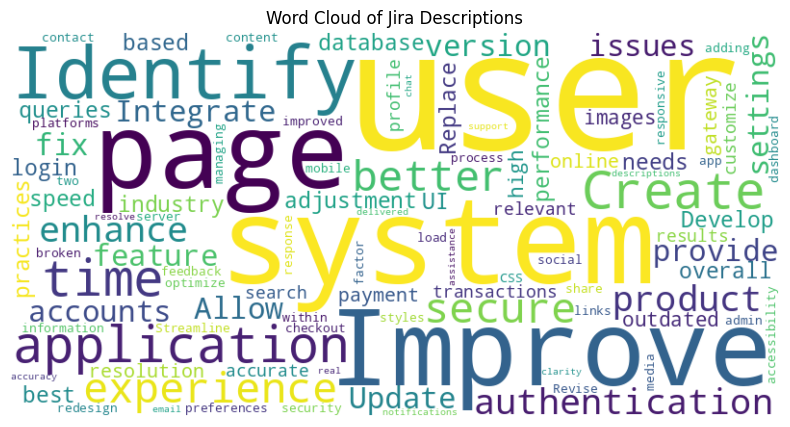

In [8]:
#Create a word cloud with most common words in the field "Description"

from wordcloud import WordCloud
import matplotlib.pyplot as plt

jira_descriptions = df['Description'].dropna().astype(str)

# Concatenate all descriptions into a single string
text = ' '.join(jira_descriptions)

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='white').generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Jira Descriptions')
plt.show()
